In [5]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

# 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('./서울시 코로나19 확진자 현황.csv', low_memory=False)
df

# 데이터 확인 및 전처리

## 컬럼별 데이터 확인

In [ ]:
df['조치사항'].unique()

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

# 불필요한 컬럼 삭제

In [ ]:
df.drop(columns =['환자번호', '국적', '환자정보',
                  '조치사항', '이동경로', '등록일',
                  '수정일', '노출여부'], inplace=True)
df

In [12]:
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [14]:
# 확진일 -> datetime
df['확진일'] = pd.to_datetime(df['확진일'])

In [ ]:
df.dtypes

In [17]:
#지역의 공백제거
df['지역'].nunique()

29

In [18]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [19]:
df['지역'] = df['지역'].str.strip()

In [ ]:
df['지역'].nunique()

In [ ]:
df['지역'].unique()

In [22]:
#지역, 타입을 category로 변경
df['지역'] = df['지역'].astype('category')

In [ ]:
df.info()

# 구별 확진자 동향
확진일 - 구별 확진자수 집계
pivotable 만들기

In [ ]:
df_gu = pd.pivot_table(df, index='확진일', columns='지역',
                       values='연번', aggfunc='count',
                       margins=True)
df_gu

## 서울시 일별 추가 확진자 동향

In [ ]:
s_date = df_gu['All'][:-1]
s_date

In [ ]:
# 일별 추가 확진자가 많았던 순
s_date.sort_values(ascending=False)

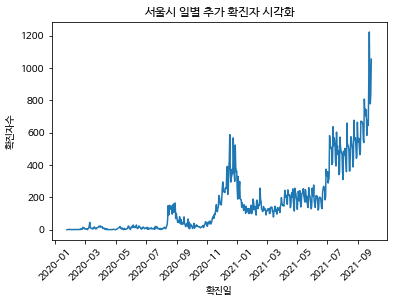

In [30]:
# 서울시 일별 추가 확진자 시각화
x = s_date.index
y = s_date.values
plt.plot(x, y)
plt.title('서울시 일별 추가 확진자 시각화')
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

## 서울 구별 누적확진자 비교

In [33]:
# 서울시 구별 누적 환진자가 많은 순으로 
s_gu = df_gu.loc["All"][:-1]

In [ ]:
s_gu = s_gu.sort_values(ascending=False)
s_gu

In [ ]:
# 서울시 구별 누적 확진자 많은순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(10,8))
plt.barh(x, y)
plt.title('서울시 구별 누적확진자수', size= 10)
plt.xlabel('확진자수')
plt.ylabel('자치구')
plt.show()

## 접촉력에 따른 확진자수

In [ ]:
# best10
df['접촉력'].value_counts()[:10].to_frame()

## 최근 월 접촉력에 따른 확진건수 best10
* 2021-9

In [ ]:
# df[#조건21년이면서 9월]['접촉력'].value_counts()[:10].to_frame()
# df[(df['확진일'].dt.year == 2021)&(df['확진일'].dt.month == 9)]

In [ ]:
df[(df['확진일'].dt.year == 2021)&(df['확진일'].dt.month == 9)]['접촉력'].value_counts()[:10].to_frame()